In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm
import seaborn as sns

In [18]:
# CSV dosyasını oku
df = pd.read_csv("deprem_verisi.csv")

In [19]:
df.describe()

,No,Deprem Kodu,Enlem,Boylam,derinlik_km,xM,MD,ML,Mw,Ms,Mb
count,2623.000000,2.623000e+03,2623.000000,2623.000000,2623.000000,2623.000000,2623.000000,2623.000000,882.000000,2623.000000,2623.000000
mean,1312.000000,1.996219e+13,40.672787,32.818044,10.900877,4.031910,2.141555,1.932368,4.031066,0.657110,1.319520
std,757.339202,2.028979e+11,0.394793,5.269624,10.957189,0.578577,2.044732,2.090982,1.221464,1.648473,2.027639
min,1.000000,1.931073e+13,40.000000,26.000000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,656.500000,1.984033e+13,40.400000,28.790000,5.000000,3.600000,0.000000,0.000000,3.700000,0.000000,0.000000
50%,1312.000000,1.999111e+13,40.690000,31.291200,9.000000,3.800000,3.500000,0.000000,4.100000,0.000000,0.000000
75%,1967.500000,2.011073e+13,40.845000,35.330000,12.000000,4.300000,3.900000,3.900000,4.700000,0.000000,3.700000
max,2623.000000,2.025063e+13,41.998200,44.999000,100.000000,7.500000,6.700000,7.000000,7.500000,7.200000,6.600000


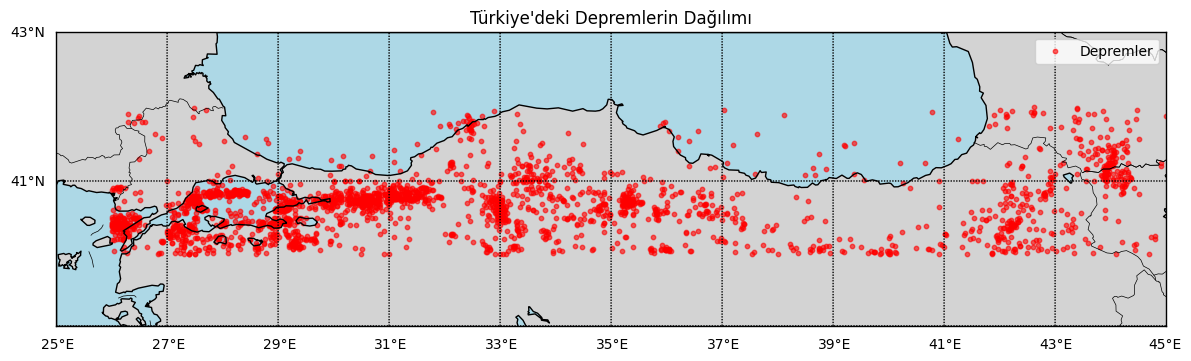

In [20]:
# Harita sınırları (Türkiye'ye odaklanalım)
lon_min, lon_max = 25, 45
lat_min, lat_max = 39, 43

# Haritayı oluştur
plt.figure(figsize=(12, 8))
m = Basemap(projection='merc', 
            llcrnrlon=lon_min, llcrnrlat=lat_min, 
            urcrnrlon=lon_max, urcrnrlat=lat_max,
            resolution='i')

# Harita bileşenleri
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgray', lake_color='lightblue')
m.drawparallels(range(35, 44, 2), labels=[1,0,0,0])
m.drawmeridians(range(25, 46, 2), labels=[0,0,0,1])

# Deprem koordinatlarını haritaya dönüştür
x, y = m(df["Boylam"].values, df["Enlem"].values)

# Depremleri çiz (büyüklüğe göre renkli veya boyutlu yapabilirsin)
m.scatter(x, y, s=10, c='red', alpha=0.6, label="Depremler")

# Başlık ve gösterge
plt.title("Türkiye'deki Depremlerin Dağılımı")
plt.legend()
plt.tight_layout()
plt.show()


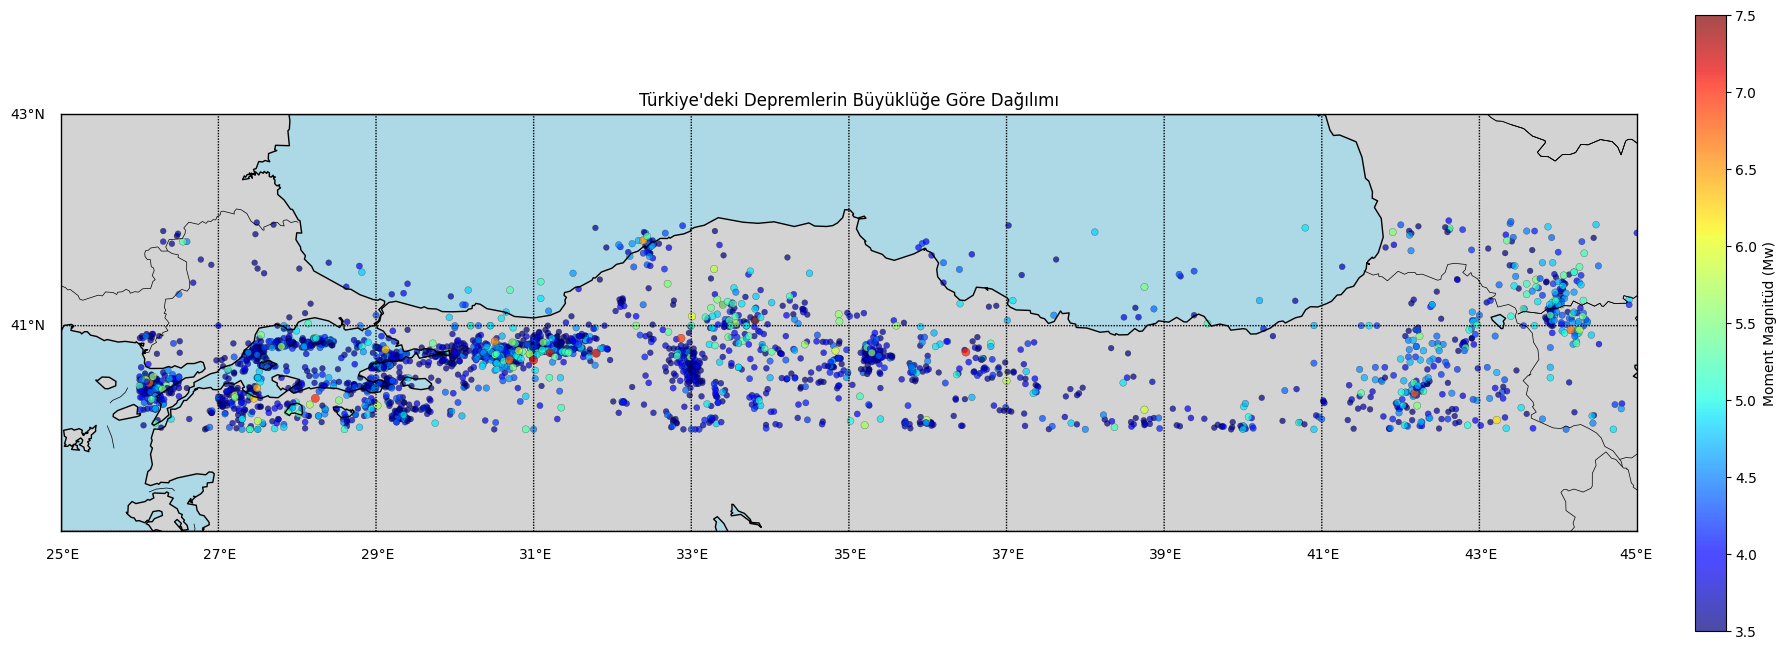

In [21]:
# Mw değeri olmayanları filtrele (NaN olanlar hata verir)
df = df[df["xM"].notna()]

# Harita sınırları
lon_min, lon_max = 25, 45
lat_min, lat_max = 39, 43

# Haritayı başlat
plt.figure(figsize=(20, 8))
m = Basemap(projection='merc', 
            llcrnrlon=lon_min, llcrnrlat=lat_min, 
            urcrnrlon=lon_max, urcrnrlat=lat_max,
            resolution='i')

# Harita detayları
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgray', lake_color='lightblue')
m.drawparallels(range(35, 44, 2), labels=[1,0,0,0])
m.drawmeridians(range(25, 46, 2), labels=[0,0,0,1])

# Koordinat dönüşümü
x, y = m(df["Boylam"].values, df["Enlem"].values)

# Scatter plot: renk = Mw, büyüklük = Mw * 3
sc = m.scatter(x, y, c=df["xM"], cmap="jet", s=df["xM"]*5, alpha=0.7, edgecolors='k', linewidths=0.2)

# Colorbar
cbar = plt.colorbar(sc, shrink=0.8, pad=0.03)
cbar.set_label("Moment Magnitüd (Mw)")

# Başlık
plt.title("Türkiye'deki Depremlerin Büyüklüğe Göre Dağılımı")
plt.tight_layout()
plt.show()

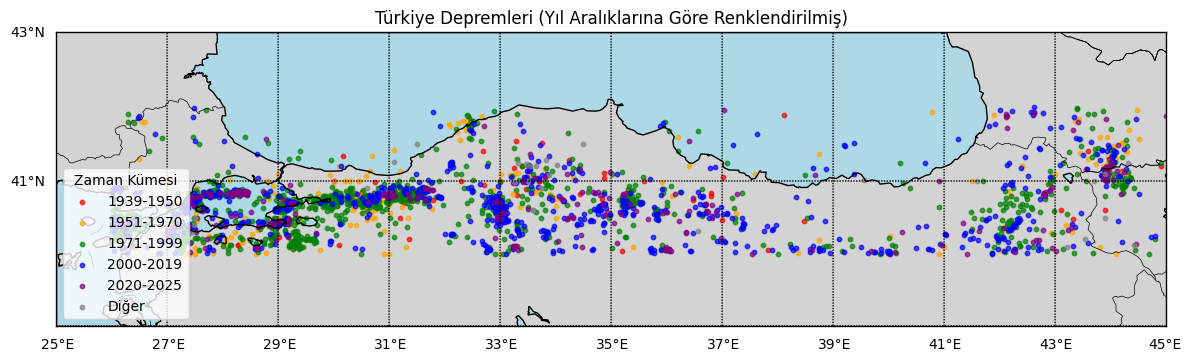

In [22]:
# Geçerli Mw ve tarih bilgisi olanları al
df = df[df["xM"].notna() & df["Tarih"].notna()]

# Tarih kolonu datetime'e çevir
df["Tarih"] = pd.to_datetime(df["Tarih"], errors='coerce')

# Yıl bilgisini çıkar
df["Yil"] = df["Tarih"].dt.year

# Kümeleri tanımla
def yıl_kümesi(y):
    if 1939 <= y <= 1950:
        return "1939-1950"
    elif 1951 <= y <= 1970:
        return "1951-1970"
    elif 1971 <= y <= 1999:
        return "1971-1999"
    elif 2000 <= y <= 2019:
        return "2000-2019"
    elif 2020 <= y <= 2025:
        return "2020-2025"
    else:
        return "Diğer"

df["zaman_kümesi"] = df["Yil"].apply(lambda y: yıl_kümesi(y) if pd.notna(y) else "Bilinmiyor")

# Harita ayarları
plt.figure(figsize=(12, 8))
m = Basemap(projection='merc', llcrnrlon=25, llcrnrlat=39, urcrnrlon=45, urcrnrlat=43, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgray', lake_color='lightblue')
m.drawparallels(range(35, 44, 2), labels=[1,0,0,0])
m.drawmeridians(range(25, 46, 2), labels=[0,0,0,1])

# Renk paleti
colors = {
    "1939-1950": "red",
    "1951-1970": "orange",
    "1971-1999": "green",
    "2000-2019": "blue",
    "2020-2025": "purple",
    "Diğer": "gray"
}

# Her küme için ayrı çizim
for cluster, group in df.groupby("zaman_kümesi"):
    x, y = m(group["Boylam"].values, group["Enlem"].values)
    m.scatter(x, y, s=10, color=colors.get(cluster, "gray"), label=cluster, alpha=0.7)

# Başlık ve legend
plt.title("Türkiye Depremleri (Yıl Aralıklarına Göre Renklendirilmiş)")
plt.legend(title="Zaman Kümesi", loc='lower left')
plt.tight_layout()
plt.show()

### 📌 Önerilen Zaman Aralıkları (Literatürden İlhamla)

Kuzey Anadolu Fayı’ndaki tarihsel kırılmalar dikkate alınarak deprem verileri şu zaman kümelerine ayrılabilir:

| Küme Adı | Yıl Aralığı  | Açıklama                  |
|----------|--------------|---------------------------|
| `grp1`   | 1939–1950     | Erzincan, Tokat           |
| `grp2`   | 1951–1970     | Bolu, Adapazarı           |
| `grp3`   | 1971–1999     | Düzce, İzmit              |
| `grp4`   | 2000–2019     | Marmara sessizliği        |
| `grp5`   | 2020–2025     | Olası gelecektekiler      |


In [23]:
# Tarihleri datetime formatına çevir
df["Tarih"] = pd.to_datetime(df["Tarih"], errors="coerce")

# Yıl ve ay gibi sütunları çıkar
df["Yil"] = df["Tarih"].dt.year
df["Ay"] = df["Tarih"].dt.month

# En yaygın büyüklük ölçüsü olarak Mw seçelim
df_mw = df[df["xM"].notna()]

# Genel istatistiksel özet
istatistikler = {
    "Toplam deprem sayısı": len(df),
    "xM değeri olan deprem sayısı": len(df_mw),
    "Minimum xM": df_mw["xM"].min(),
    "Ortalama xM": df_mw["xM"].mean(),
    "Medyan xM": df_mw["xM"].median(),
    "Maksimum xM": df_mw["xM"].max(),
    "Ortalama derinlik (km)": df["derinlik_km"].mean(),
    "En derin deprem (km)": df["derinlik_km"].max(),
    "En sığ deprem (km)": df["derinlik_km"].min(),
    "Tarihi bilinen en eski deprem": df["Tarih"].min(),
    "Tarihi bilinen en yeni deprem": df["Tarih"].max(),
    "Farklı yerleşim sayısı": df["Yer"].nunique()
}

# Sonucu göster
for k, v in istatistikler.items():
    print(f"{k}: {v}")

Toplam deprem sayısı: 2623
xM değeri olan deprem sayısı: 2623
Minimum xM: 3.5
Ortalama xM: 4.031910026687
Medyan xM: 3.8
Maksimum xM: 7.5
Ortalama derinlik (km): 10.900876858558902
En derin deprem (km): 100.0
En sığ deprem (km): 0.0
Tarihi bilinen en eski deprem: 1931-07-31 00:00:00
Tarihi bilinen en yeni deprem: 2025-06-29 00:00:00
Farklı yerleşim sayısı: 2008


---

In [24]:
# Tarih ve Mw verisi olanları filtrele
df_clean = df[df["Tarih"].notna() & df["Boylam"].notna()]

# Gerekli sütunlar
df_clean = df_clean[["Tarih", "Boylam", "Enlem", "xM"]]
df_clean["Yil"] = df_clean["Tarih"].dt.year

# Sadece Kuzey Anadolu Fayı'na odaklanmak istersek (örnek alan)
# df_clean = df_clean[(df_clean["enlem"] >= 39) & (df_clean["enlem"] <= 41.5) & 
#                     (df_clean["boylam"] >= 27) & (df_clean["boylam"] <= 40)]

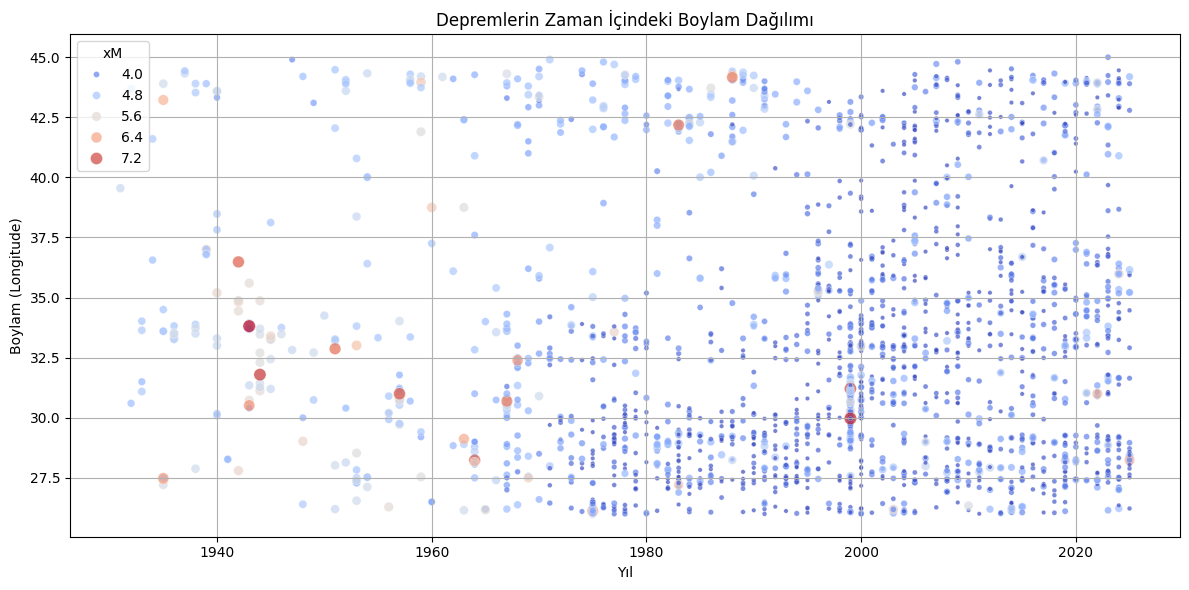

In [25]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_clean, x="Yil", y="Boylam", hue="xM", palette="coolwarm", size="xM", sizes=(10, 80), alpha=0.7)
plt.title("Depremlerin Zaman İçindeki Boylam Dağılımı")
plt.xlabel("Yıl")
plt.ylabel("Boylam (Longitude)")
plt.legend(title="xM")
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
# Sadece tarih, boylam ve mag bilgisi olanları al
df_clean = df[df["Tarih"].notna() & df["Boylam"].notna() & df["xM"].notna()]

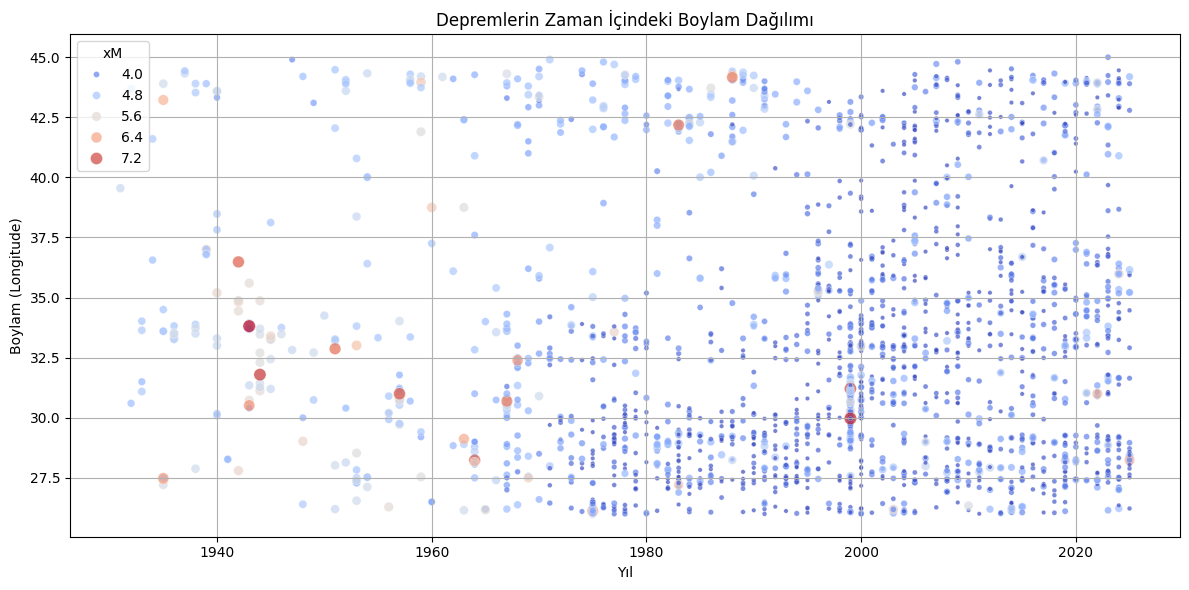

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_clean, x="Yil", y="Boylam", hue="xM", size="xM",
                palette="coolwarm", sizes=(10, 80), alpha=0.7, legend="brief")

plt.title("Depremlerin Zaman İçindeki Boylam Dağılımı")
plt.xlabel("Yıl")
plt.ylabel("Boylam (Longitude)")
plt.grid(True)
plt.tight_layout()
plt.show()


Lineer regresyon eğimi: 0.0063


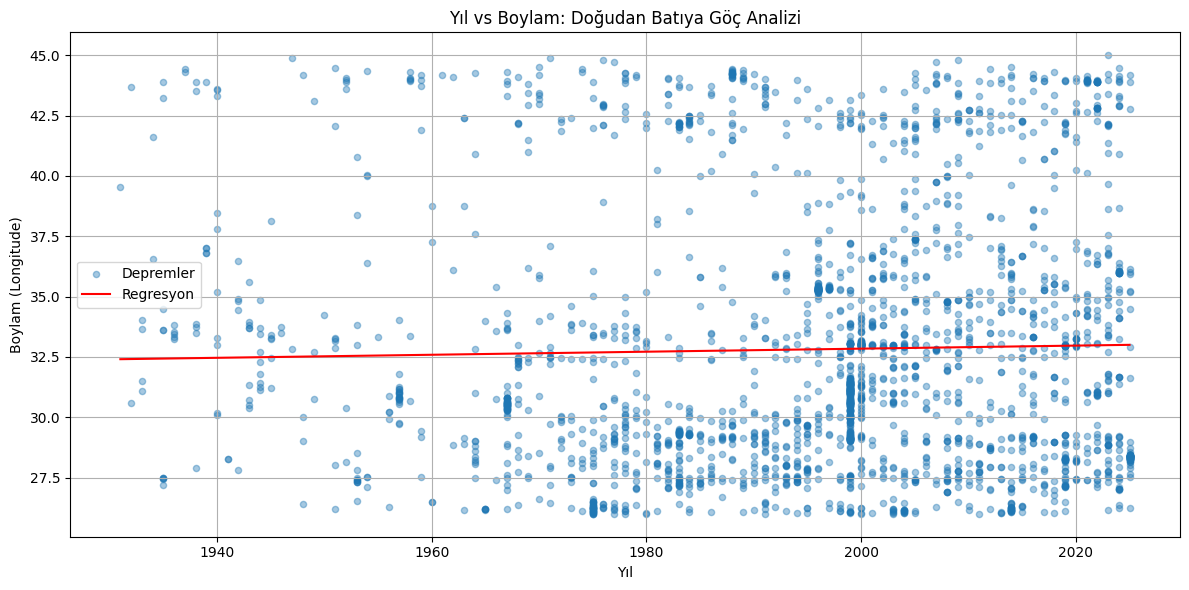

In [28]:
from sklearn.linear_model import LinearRegression
import numpy as np

# NaN içermeyenleri al
data = df_clean.dropna(subset=["Yil", "Boylam"])
X = data["Yil"].values.reshape(-1, 1)
y = data["Boylam"].values

# Modeli eğit
model = LinearRegression()
model.fit(X, y)

# Regresyon eğimi
eğim = model.coef_[0]
print(f"Lineer regresyon eğimi: {eğim:.4f}")

# Tahmin çizgisi
y_pred = model.predict(X)

# Grafik
plt.figure(figsize=(12,6))
plt.scatter(data["Yil"], data["Boylam"], alpha=0.4, label="Depremler", s=20)
plt.plot(data["Yil"], y_pred, color='red', label="Regresyon")
plt.title("Yıl vs Boylam: Doğudan Batıya Göç Analizi")
plt.xlabel("Yıl")
plt.ylabel("Boylam (Longitude)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Eğim (slope): 0.0063
R² skoru: 0.0006


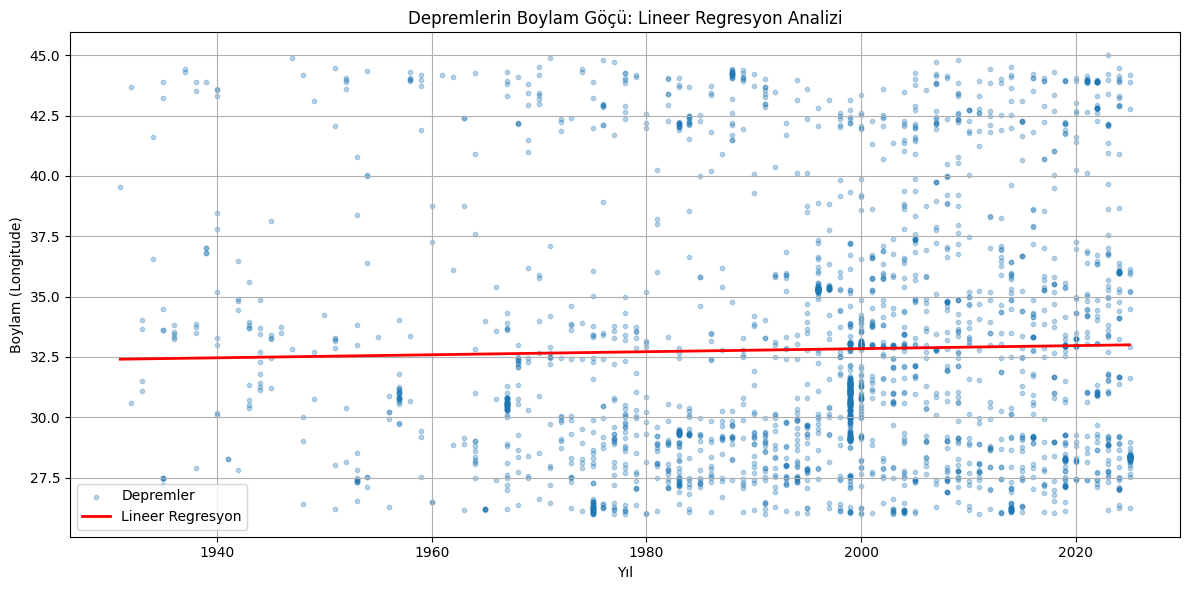

In [29]:
# Girdi ve çıktı
X = df_clean["Yil"].values.reshape(-1, 1)
y = df_clean["Boylam"].values

# Modeli eğit
model = LinearRegression()
model.fit(X, y)

# Eğim ve R² değeri
eğim = model.coef_[0]
r2 = model.score(X, y)

print(f"Eğim (slope): {eğim:.4f}")
print(f"R² skoru: {r2:.4f}")

# Tahmin çizgisi
y_pred = model.predict(X)

# Grafik
plt.figure(figsize=(12, 6))
plt.scatter(df_clean["Yil"], df_clean["Boylam"], alpha=0.3, s=10, label="Depremler")
plt.plot(df_clean["Yil"], y_pred, color='red', label="Lineer Regresyon", linewidth=2)
plt.title("Depremlerin Boylam Göçü: Lineer Regresyon Analizi")
plt.xlabel("Yıl")
plt.ylabel("Boylam (Longitude)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Depremler (≥5.0)

In [30]:
# Sadece >=5.0 büyüklükte olanları al
df_big = df[(df["Tarih"].notna()) & (df["Boylam"].notna()) & (df["xM"].notna()) & (df["xM"] >= 5.0)]

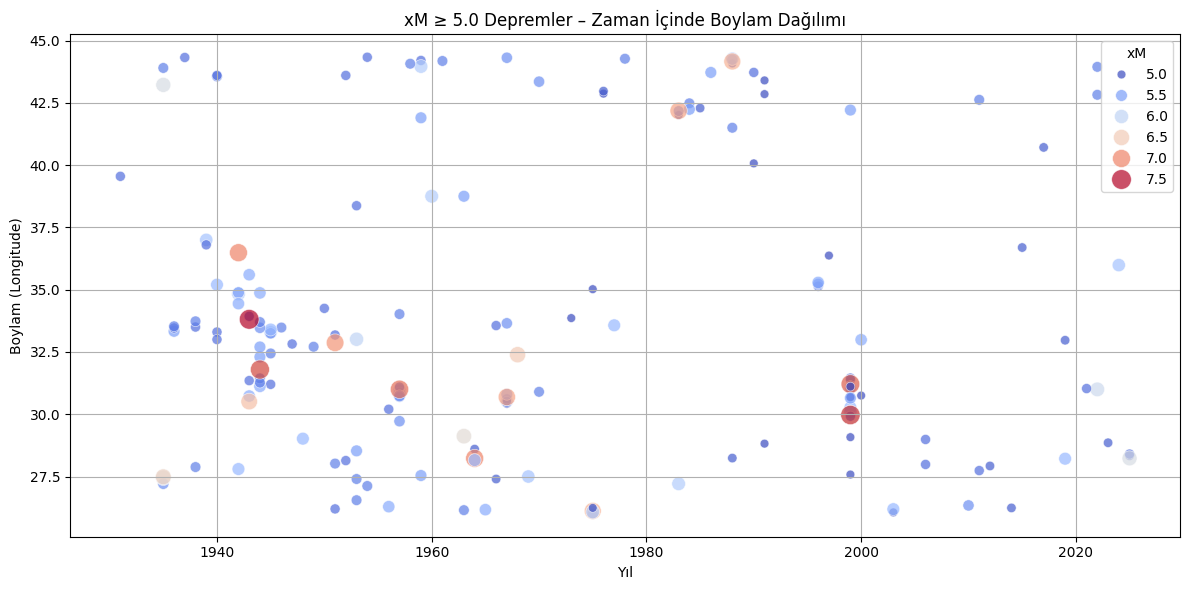

In [31]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_big, x="Yil", y="Boylam", hue="xM", size="xM",
                palette="coolwarm", sizes=(40, 200), alpha=0.7, legend="brief")

plt.title("xM ≥ 5.0 Depremler – Zaman İçinde Boylam Dağılımı")
plt.xlabel("Yıl")
plt.ylabel("Boylam (Longitude)")
plt.grid(True)
plt.tight_layout()
plt.show()

Lineer regresyon eğimi: -0.0061
R² skoru: 0.0008


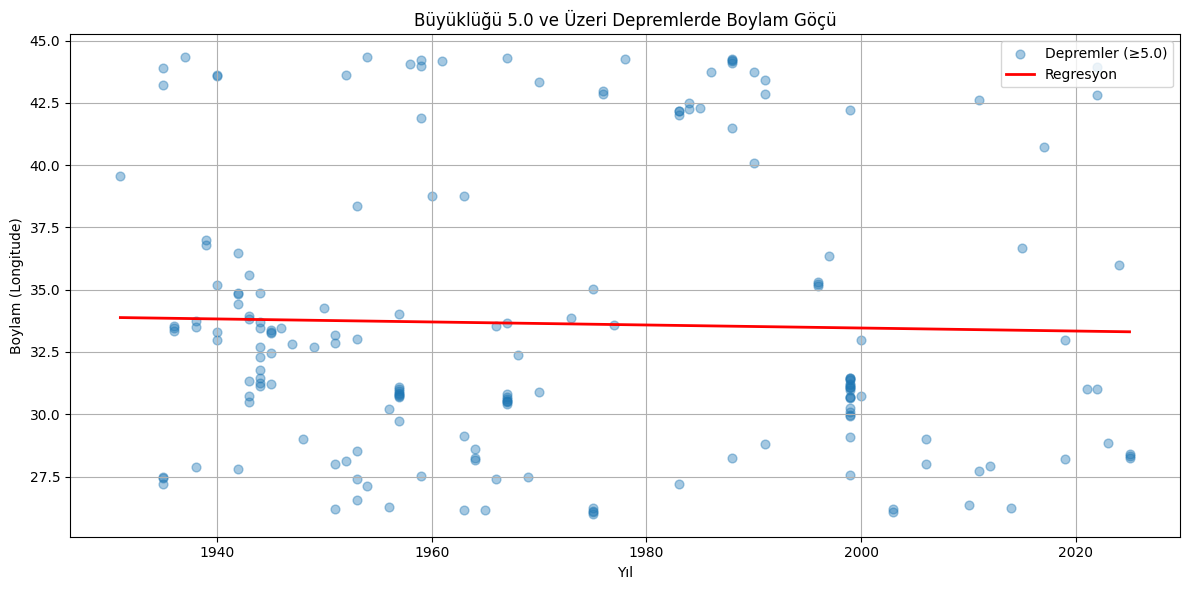

In [32]:
# Girdi ve çıktı
X = df_big["Yil"].values.reshape(-1, 1)
y = df_big["Boylam"].values

# Model
model = LinearRegression()
model.fit(X, y)

# Eğim ve R²
slope = model.coef_[0]
r2 = model.score(X, y)

print(f"Lineer regresyon eğimi: {slope:.4f}")
print(f"R² skoru: {r2:.4f}")

# Tahmin çizgisi
y_pred = model.predict(X)

# Grafik
plt.figure(figsize=(12, 6))
plt.scatter(df_big["Yil"], df_big["Boylam"], alpha=0.4, s=40, label="Depremler (≥5.0)")
plt.plot(df_big["Yil"], y_pred, color="red", label="Regresyon", linewidth=2)
plt.title("Büyüklüğü 5.0 ve Üzeri Depremlerde Boylam Göçü")
plt.xlabel("Yıl")
plt.ylabel("Boylam (Longitude)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Depremler (≥6.0)

In [34]:
# Sadece >=6.0 büyüklükte olanları al
df_6 = df[(df["Tarih"].notna()) & (df["Boylam"].notna()) & (df["xM"].notna()) & (df["xM"] >= 6.0)]

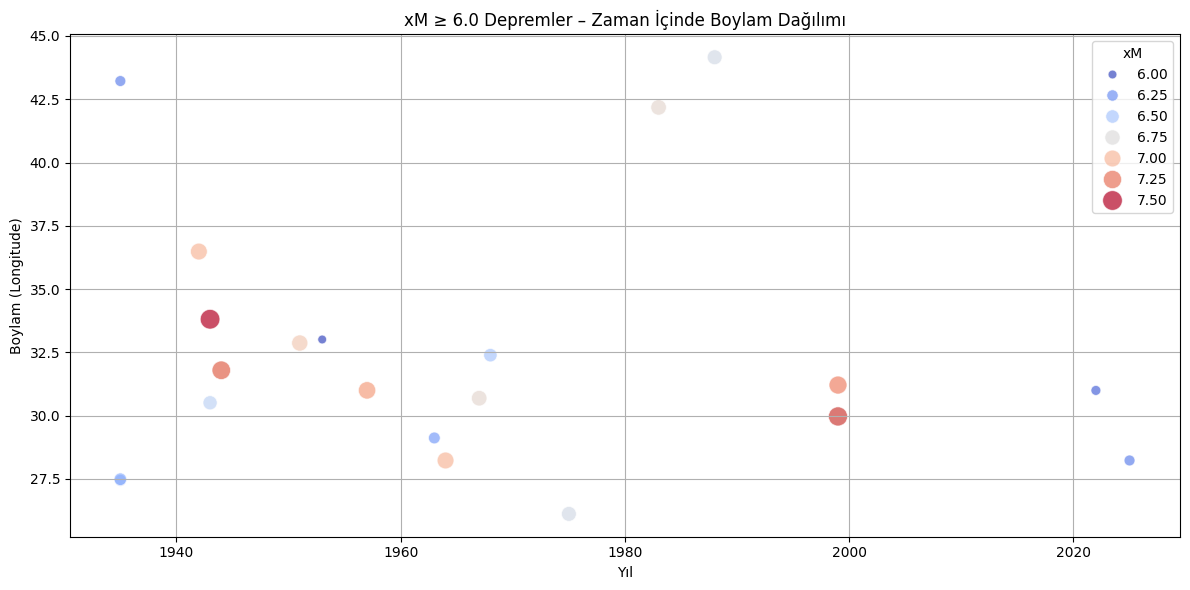

In [35]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_6, x="Yil", y="Boylam", hue="xM", size="xM",
                palette="coolwarm", sizes=(40, 200), alpha=0.7, legend="brief")

plt.title("xM ≥ 6.0 Depremler – Zaman İçinde Boylam Dağılımı")
plt.xlabel("Yıl")
plt.ylabel("Boylam (Longitude)")
plt.grid(True)
plt.tight_layout()
plt.show()

Lineer regresyon eğimi: -0.0109
R² skoru: 0.0034


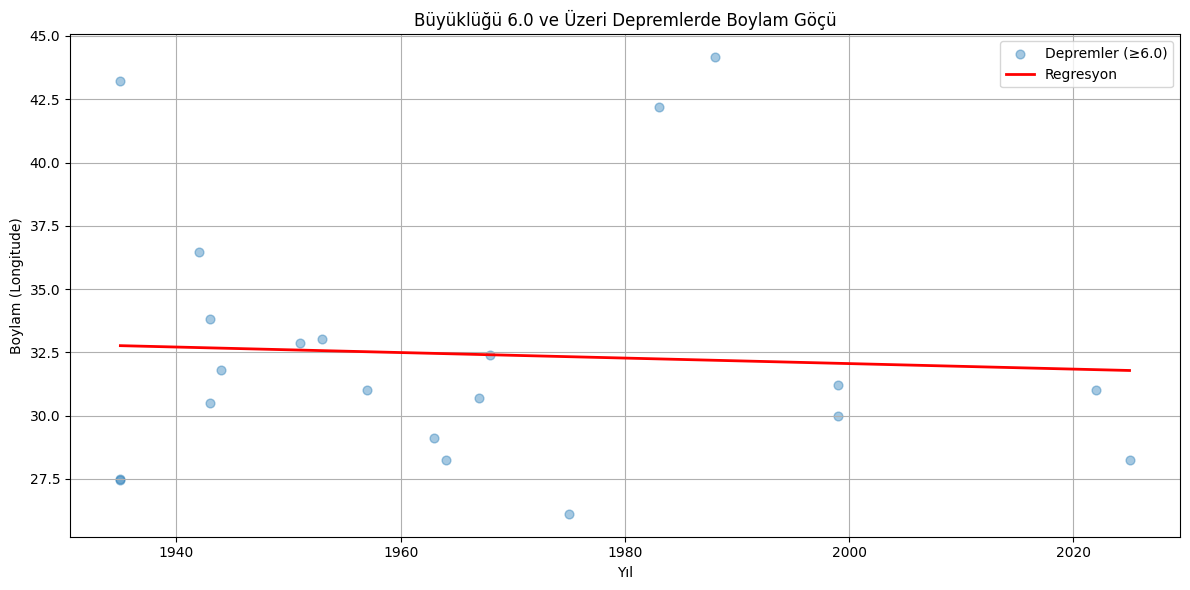

In [36]:
# Girdi ve çıktı
X = df_6["Yil"].values.reshape(-1, 1)
y = df_6["Boylam"].values

# Model
model = LinearRegression()
model.fit(X, y)

# Eğim ve R²
slope = model.coef_[0]
r2 = model.score(X, y)

print(f"Lineer regresyon eğimi: {slope:.4f}")
print(f"R² skoru: {r2:.4f}")

# Tahmin çizgisi
y_pred = model.predict(X)

# Grafik
plt.figure(figsize=(12, 6))
plt.scatter(df_6["Yil"], df_6["Boylam"], alpha=0.4, s=40, label="Depremler (≥6.0)")
plt.plot(df_6["Yil"], y_pred, color="red", label="Regresyon", linewidth=2)
plt.title("Büyüklüğü 6.0 ve Üzeri Depremlerde Boylam Göçü")
plt.xlabel("Yıl")
plt.ylabel("Boylam (Longitude)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
buyuk_yillar = [1939, 1942, 1943, 1944, 1951, 1957, 1967, 1971, 1992, 1949, 1966]

df_buyuk = df_big[df_big["Yil"].isin(buyuk_yillar)].copy()


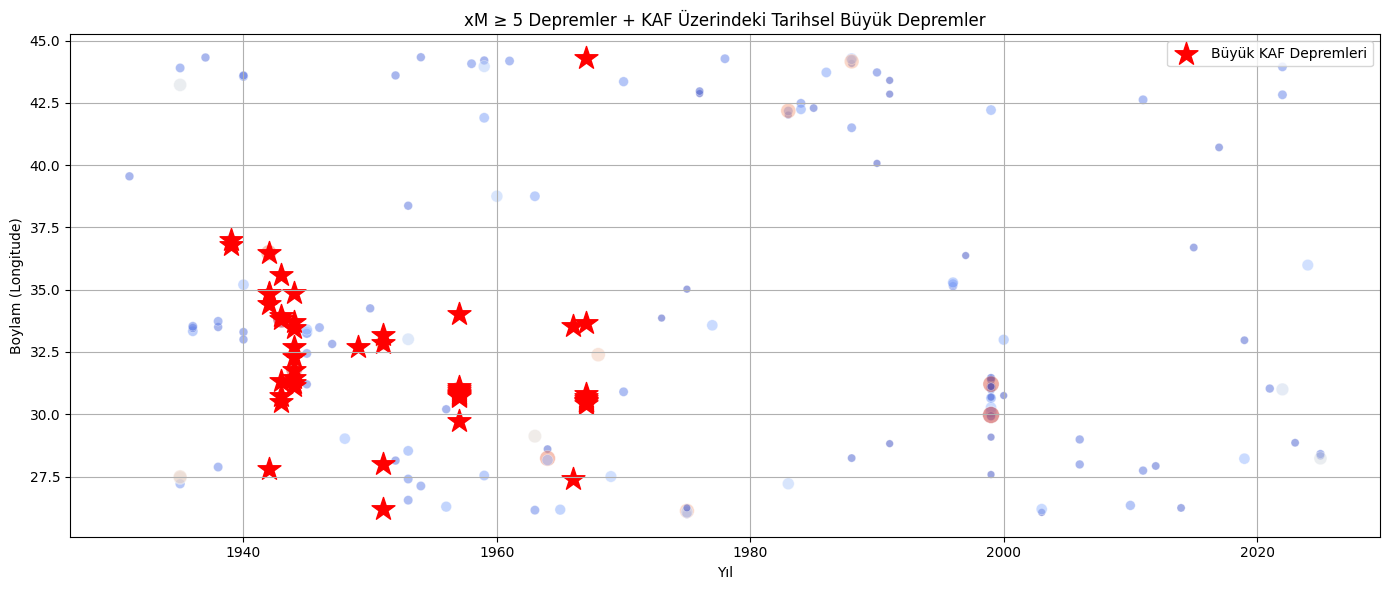

In [38]:
plt.figure(figsize=(14, 6))

# Tüm 5+ depremleri göster
sns.scatterplot(data=df_big, x="Yil", y="Boylam", hue="xM", palette="coolwarm", size="xM", sizes=(30, 150), alpha=0.5, legend=False)

# Büyük depremleri kırmızı yıldızla göster
plt.scatter(df_buyuk["Yil"], df_buyuk["Boylam"], color="red", marker="*", s=300, label="Büyük KAF Depremleri")

plt.title("xM ≥ 5 Depremler + KAF Üzerindeki Tarihsel Büyük Depremler")
plt.xlabel("Yıl")
plt.ylabel("Boylam (Longitude)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
X_big_eq = df_buyuk["Yil"].values.reshape(-1, 1)
y_big_eq = df_buyuk["Boylam"].values

model_big_eq = LinearRegression()
model_big_eq.fit(X_big_eq, y_big_eq)

slope_big = model_big_eq.coef_[0]
r2_big = model_big_eq.score(X_big_eq, y_big_eq)

print(f"Büyük depremler regresyon eğimi: {slope_big:.4f}")
print(f"R²: {r2_big:.4f}")

Büyük depremler regresyon eğimi: -0.0673
R²: 0.0508


In [40]:
# Önce büyük depremler dataframe'ini yıl sırasına göre sırala
df_buyuk_sorted = df_buyuk.sort_values(by="Yil").reset_index(drop=True)

# Fark sütunlarını hesapla
df_buyuk_sorted["yıl_farkı"] = df_buyuk_sorted["Yil"].diff()
df_buyuk_sorted["boylam_farkı"] = df_buyuk_sorted["Boylam"].diff()


In [29]:
# İncelenecek sütunları seç
cols = ["Tarih", "mag", "Boylam", "Enlem", "yıl_farkı", "boylam_farkı"]
print(df_buyuk_sorted[cols])


        Tarih  mag   Boylam    Enlem  yıl_farkı  boylam_farkı
0  1939-12-27  5.2  36.8000  40.8300        NaN           NaN
1  1939-12-28  5.8  37.0000  40.4700        0.0        0.2000
2  1942-11-21  5.6  34.4400  40.8200        3.0       -2.5600
3  1942-12-02  5.5  34.8800  41.0400        0.0        0.4400
4  1942-12-11  5.9  34.8300  40.7600        0.0       -0.0500
5  1942-12-20  7.0  36.4840  40.7470        0.0        1.6540
6  1942-06-16  5.7  27.8000  40.8000        0.0       -8.6840
7  1943-06-20  6.4  30.5100  40.8500        1.0        2.7100
8  1943-06-20  5.6  30.7300  40.8400        0.0        0.2200
9  1943-09-06  5.2  31.3500  40.2100        0.0        0.6200
10 1943-11-26  7.5  33.8098  41.0537        0.0        2.4598
11 1943-11-27  5.2  33.9300  40.7800        0.0        0.1202
12 1944-10-18  5.4  33.4700  40.8900        1.0       -0.4600
13 1944-09-30  5.6  34.8700  41.1100        0.0        1.4000
14 1944-04-05  5.6  31.1200  40.8400        0.0       -3.7500
15 1944-

In [41]:
df_buyuk_sorted["uzaysal_fark_km"] = df_buyuk_sorted["boylam_farkı"].abs() * 85


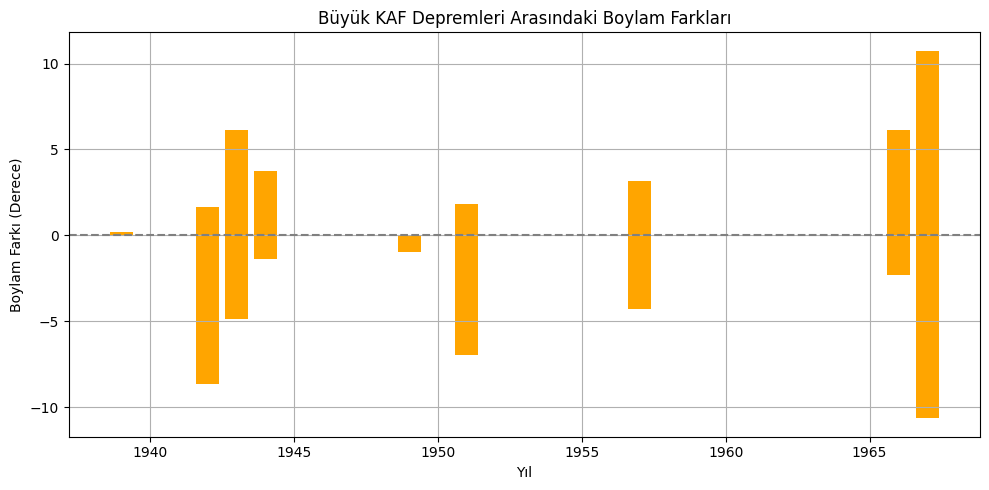

In [42]:
plt.figure(figsize=(10,5))
plt.bar(df_buyuk_sorted["Yil"], df_buyuk_sorted["boylam_farkı"], color='orange')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Büyük KAF Depremleri Arasındaki Boylam Farkları")
plt.xlabel("Yıl")
plt.ylabel("Boylam Farkı (Derece)")
plt.grid(True)
plt.tight_layout()
plt.show()


# MODEL

In [43]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Tarih dönüşümü
df["Tarih"] = pd.to_datetime(df["Tarih"], errors="coerce")

# Yıl sırasına göre Mw ≥ 6 depremler
df_6plus = df[df["xM"] >= 6.0].dropna(subset=["Tarih", "Boylam"])
df_6plus = df_6plus.sort_values("Tarih").reset_index(drop=True)

# Zamansal X: her depremi bir sıraya koy
df_6plus["time_index"] = np.arange(len(df_6plus))

# X = time, y = boylam
X = df_6plus["time_index"].values.reshape(-1, 1)
y = df_6plus["Boylam"].values.reshape(-1, 1)

# Normalize et (opsiyonel)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)


In [44]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# SVR modeli
model = SVR(kernel='rbf', C=100, epsilon=0.01)
model.fit(X, y_scaled.ravel())

# Tahminler
X_pred = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_pred_scaled = model.predict(X_pred)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))


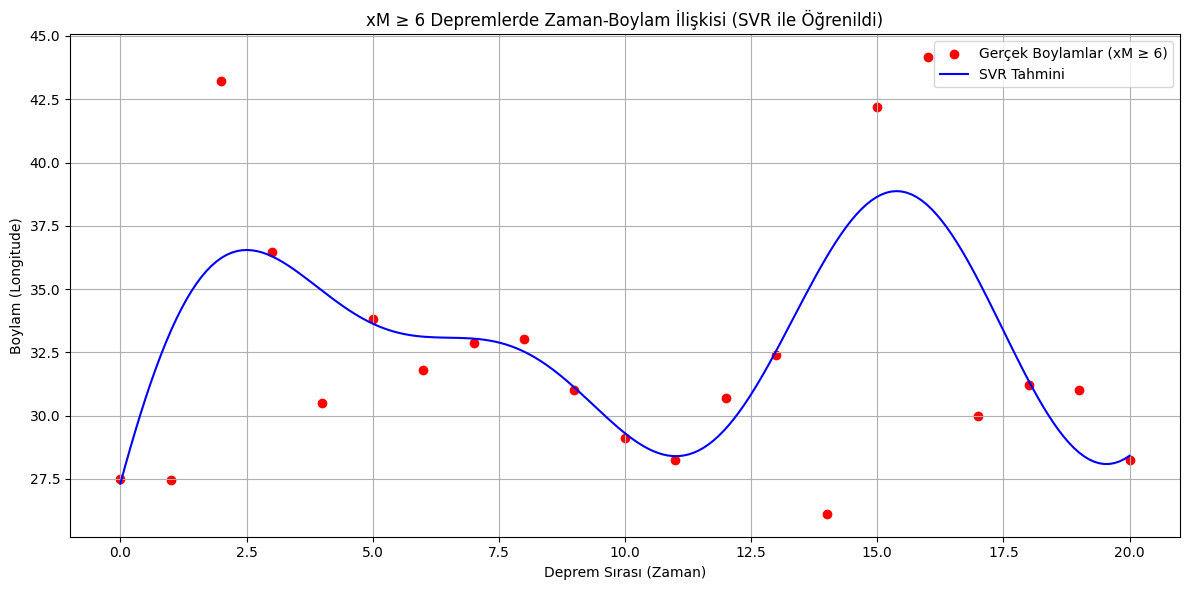

In [45]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='red', label="Gerçek Boylamlar (xM ≥ 6)")
plt.plot(X_pred, y_pred, color='blue', label="SVR Tahmini")
plt.title("xM ≥ 6 Depremlerde Zaman-Boylam İlişkisi (SVR ile Öğrenildi)")
plt.xlabel("Deprem Sırası (Zaman)")
plt.ylabel("Boylam (Longitude)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## LSTM

In [46]:
from sklearn.preprocessing import MinMaxScaler

# Depremleri sıraya koy (önceki adımlardan)
df["Tarih"] = pd.to_datetime(df["Tarih"], errors="coerce")
df_6plus = df[df["xM"] >= 6.0].dropna(subset=["Tarih", "Boylam"]).sort_values("Tarih").reset_index(drop=True)

# Boylamları al
boylam = df_6plus["Boylam"].values.reshape(-1, 1)

# Normalize et
scaler = MinMaxScaler()
boylam_scaled = scaler.fit_transform(boylam)

# Sekans oluştur (örn. 3 zaman penceresi → 1 tahmin)
def create_sequences(data, seq_length=3):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X_seq, y_seq = create_sequences(boylam_scaled, seq_length=3)


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Model
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(X_seq.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Eğitim
history = model.fit(X_seq, y_seq, epochs=200, verbose=0)


In [48]:
# Son 3 boylam verisini al
last_sequence = boylam_scaled[-3:].reshape(1, 3, 1)

# Tahmin
pred_scaled = model.predict(last_sequence)
pred_boylam = scaler.inverse_transform(pred_scaled)

print(f"🔮 Tahmin edilen bir sonraki büyük depremin boylamı ≈ {pred_boylam[0][0]:.3f}")


1/1 [==============================] - 0s 132ms/step
🔮 Tahmin edilen bir sonraki büyük depremin boylamı ≈ 32.075


1/1 [==============================] - 0s 16ms/step


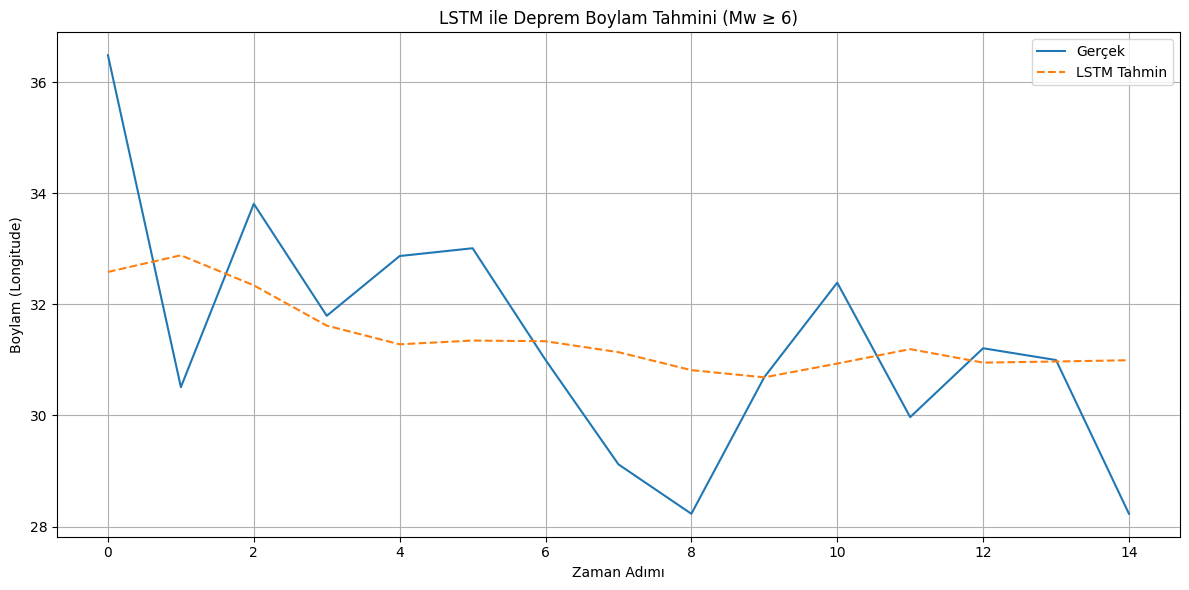

In [38]:
import matplotlib.pyplot as plt

true_vals = scaler.inverse_transform(y_seq)
pred_vals = scaler.inverse_transform(model.predict(X_seq))

plt.figure(figsize=(12,6))
plt.plot(true_vals, label="Gerçek")
plt.plot(pred_vals, label="LSTM Tahmin", linestyle="--")
plt.title("LSTM ile Deprem Boylam Tahmini (Mw ≥ 6)")
plt.xlabel("Zaman Adımı")
plt.ylabel("Boylam (Longitude)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Gerçek ve tahmin (inverselenmiş)
y_true = scaler.inverse_transform(y_seq)
y_pred_lstm = scaler.inverse_transform(model.predict(X_seq))

mae_lstm = mean_absolute_error(y_true, y_pred_lstm)
rmse = np.sqrt(mean_squared_error(y_true, y_pred_lstm))

print(f"MAE (km cinsinden ~): {mae_lstm * 85:.2f}")
print(f"RMSE (km cinsinden ~): {rmse * 85:.2f}")


1/1 [==============================] - 0s 15ms/step
MAE (km cinsinden ~): 266.18
RMSE (km cinsinden ~): 375.11


In [50]:
future_preds = []
current_input = boylam_scaled[-3:].reshape(1, 3, 1)

for _ in range(3):  # 3 tahmin yap
    next_pred = model.predict(current_input)  # (1, 1)
    
    # Tahmini sakla
    future_preds.append(scaler.inverse_transform(next_pred)[0][0])
    
    # Şekli (1, 1, 1) olacak şekilde genişlet
    next_pred_reshaped = next_pred.reshape(1, 1, 1)
    
    # Yeni input: son 2 + yeni tahmin → (1, 3, 1)
    current_input = np.concatenate([current_input[:, 1:, :], next_pred_reshaped], axis=1)

# Tahminleri göster
for i, val in enumerate(future_preds, 1):
    print(f"🔮 Tahmin {i}. Depremin Boylamı ≈ {val:.3f}°E")


1/1 [==============================] - 0s 13ms/step
🔮 Tahmin 1. Depremin Boylamı ≈ 32.075°E
🔮 Tahmin 2. Depremin Boylamı ≈ 32.213°E
🔮 Tahmin 3. Depremin Boylamı ≈ 32.280°E


## SVR

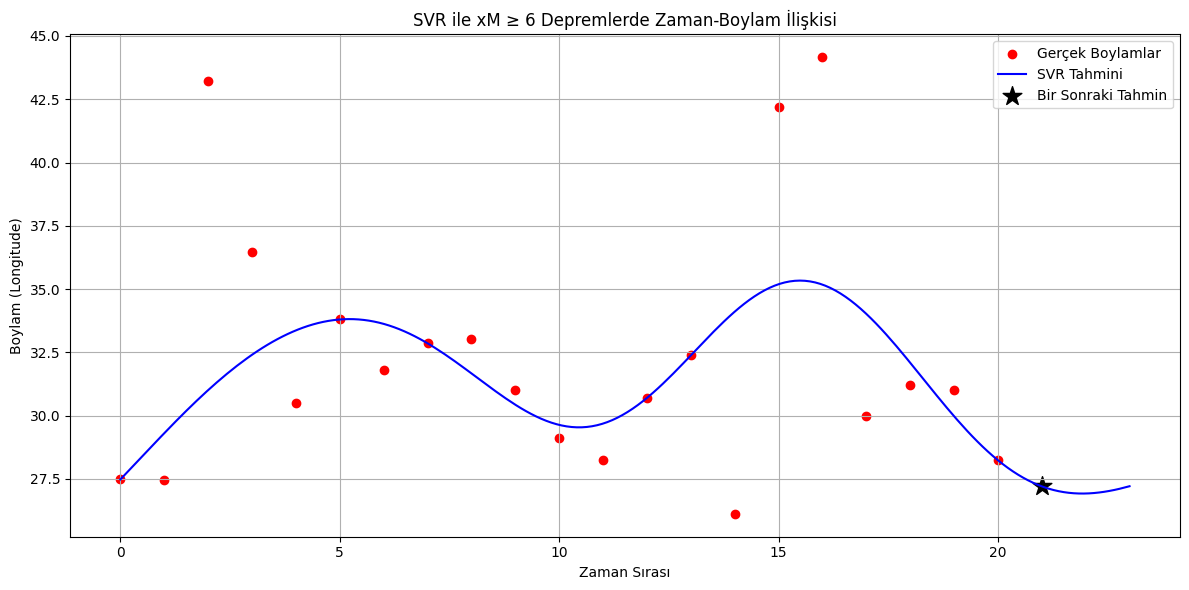

🔮 SVR Tahmini: Bir sonraki büyük depremin boylamı ≈ 27.208°E


In [51]:
from sklearn.svm import SVR

# Giriş = zaman sırası (0,1,2,...)
df_6plus["time_index"] = np.arange(len(df_6plus))
X = df_6plus["time_index"].values.reshape(-1, 1)
y = df_6plus["Boylam"].values

# SVR modeli (RBF kernel)
svr_model = SVR(kernel='rbf', C=100, epsilon=0.01)
svr_model.fit(X, y)

# Tahmin
X_pred = np.linspace(X.min(), X.max()+3, 200).reshape(-1, 1)
y_pred_svr = svr_model.predict(X_pred)

# Son tahmin
next_boylam = svr_model.predict([[X.max() + 1]])[0]

# Görsel
plt.figure(figsize=(12,6))
plt.scatter(X, y, color='red', label='Gerçek Boylamlar')
plt.plot(X_pred, y_pred_svr, label='SVR Tahmini', color='blue')
plt.scatter(X.max() + 1, next_boylam, color='black', marker='*', s=200, label='Bir Sonraki Tahmin')
plt.title("SVR ile xM ≥ 6 Depremlerde Zaman-Boylam İlişkisi")
plt.xlabel("Zaman Sırası")
plt.ylabel("Boylam (Longitude)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"🔮 SVR Tahmini: Bir sonraki büyük depremin boylamı ≈ {next_boylam:.3f}°E")


In [52]:
# Eğitim verisine tahmin uygula
y_pred_train = svr_model.predict(X)

# MAE hesapla
mae_svr = mean_absolute_error(y, y_pred_train)
print(f"📉 SVR MAE ≈ {mae_svr:.3f} derece ≈ {mae_svr*85:.1f} km")

📉 SVR MAE ≈ 2.699 derece ≈ 229.4 km


## RandomForest

In [53]:
from sklearn.ensemble import RandomForestRegressor

# Girdi: sıralı index
X_rf = df_6plus["time_index"].values.reshape(-1, 1)
y_rf = df_6plus["Boylam"].values


In [54]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_rf, y_rf)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [55]:
X_range = np.linspace(X_rf.min(), X_rf.max()+3, 200).reshape(-1, 1)
y_rfr_pred = rfr.predict(X_range)

next_rfr_pred = rfr.predict([[X_rf.max() + 1]])[0]


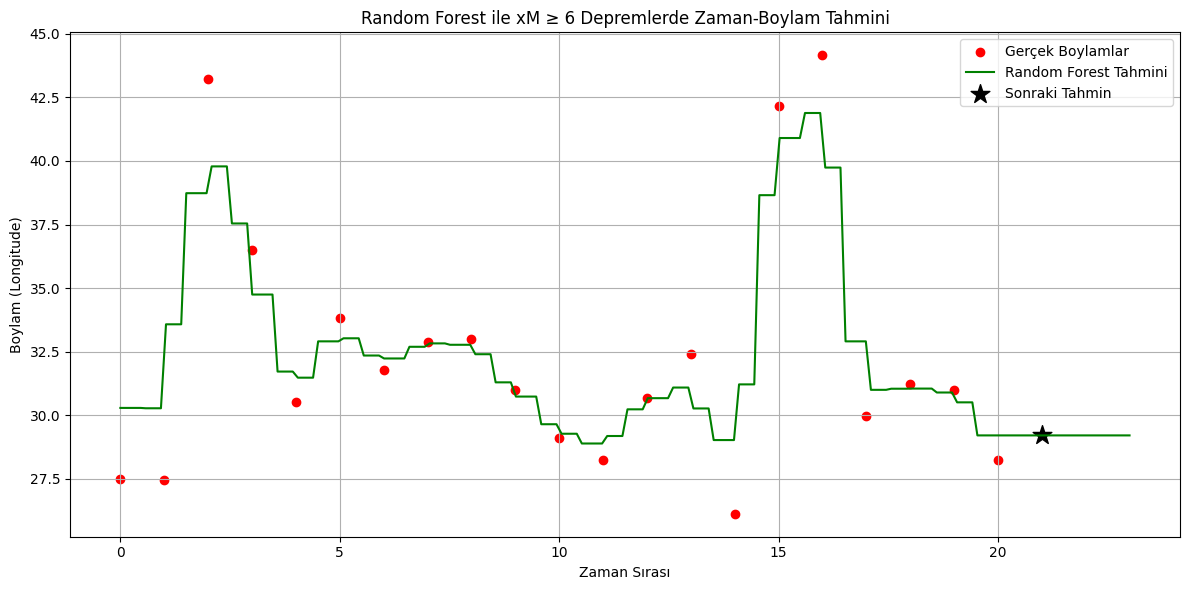

🔮 RFR Tahmini: Bir sonraki büyük depremin boylamı ≈ 29.204°E


In [56]:
plt.figure(figsize=(12,6))
plt.scatter(X_rf, y_rf, color='red', label="Gerçek Boylamlar")
plt.plot(X_range, y_rfr_pred, color='green', label="Random Forest Tahmini")
plt.scatter(X_rf.max() + 1, next_rfr_pred, color='black', marker='*', s=200, label='Sonraki Tahmin')
plt.title("Random Forest ile xM ≥ 6 Depremlerde Zaman-Boylam Tahmini")
plt.xlabel("Zaman Sırası")
plt.ylabel("Boylam (Longitude)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"🔮 RFR Tahmini: Bir sonraki büyük depremin boylamı ≈ {next_rfr_pred:.3f}°E")

In [57]:
y_rf_train_pred = rfr.predict(X_rf)
mae_rf = mean_absolute_error(y_rf, y_rf_train_pred)
print(f"RFR MAE ≈ {mae_rf:.3f}° → yaklaşık {mae_rf*85:.1f} km")


RFR MAE ≈ 1.446° → yaklaşık 122.9 km


## XGBoost Regressor

In [58]:
import xgboost as xgb

# Girdi: zaman sırası
X_xgb = df_6plus["time_index"].values.reshape(-1, 1)
y_xgb = df_6plus["Boylam"].values

In [59]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_xgb, y_xgb)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [60]:
X_range_xgb = np.linspace(X_xgb.min(), X_xgb.max() + 3, 200).reshape(-1, 1)
y_xgb_pred = xgb_model.predict(X_range_xgb)

next_xgb_pred = xgb_model.predict([[X_xgb.max() + 1]])[0]


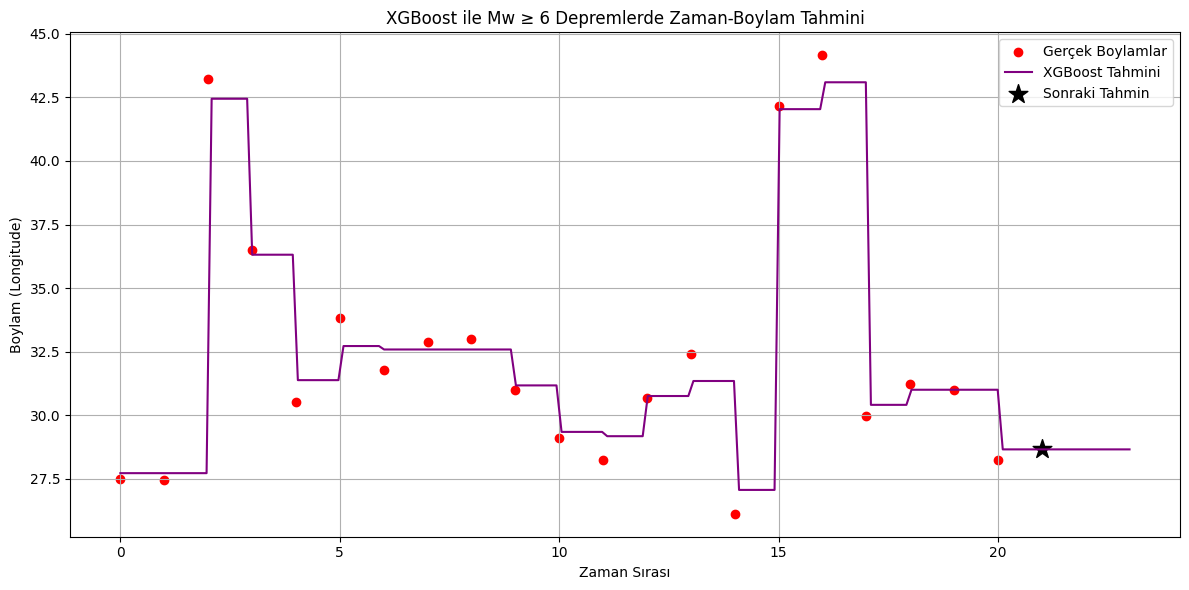

🔮 XGBoost Tahmini: Bir sonraki büyük depremin boylamı ≈ 28.654°E


In [61]:
plt.figure(figsize=(12,6))
plt.scatter(X_xgb, y_xgb, color='red', label="Gerçek Boylamlar")
plt.plot(X_range_xgb, y_xgb_pred, color='purple', label="XGBoost Tahmini")
plt.scatter(X_xgb.max() + 1, next_xgb_pred, color='black', marker='*', s=200, label='Sonraki Tahmin')
plt.title("XGBoost ile Mw ≥ 6 Depremlerde Zaman-Boylam Tahmini")
plt.xlabel("Zaman Sırası")
plt.ylabel("Boylam (Longitude)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"🔮 XGBoost Tahmini: Bir sonraki büyük depremin boylamı ≈ {next_xgb_pred:.3f}°E")

In [62]:
y_train_pred_xgb = xgb_model.predict(X_xgb)
mae_xgb = mean_absolute_error(y_xgb, y_train_pred_xgb)
print(f"XGBoost MAE ≈ {mae_xgb:.3f}° → yaklaşık {mae_xgb*85:.1f} km")


XGBoost MAE ≈ 0.503° → yaklaşık 42.7 km


# Çıktılar


In [63]:
# Senin modellerin tarafından tahmin edilen boylamlar
tahminler = {
    "LSTM": y_pred_lstm[-1][0],
    "SVR": y_pred_svr[-1],
    "RFR": y_rfr_pred[-1],
    "XGBoost": y_xgb_pred[-1]
}

# Ortalama tahmin (basit ensemble)
ortalama_boylam = sum(tahminler.values()) / len(tahminler)

print(f"🔮 Ensemble (Model Ortalaması) Tahmin Boylamı: {ortalama_boylam:.3f}°E")


🔮 Ensemble (Model Ortalaması) Tahmin Boylamı: 29.322°E


In [64]:
# MAE değerleri
mae = {
    "LSTM": mae_lstm,
    "SVR": mae_svr,
    "RFR": mae_rf,
    "XGBoost": mae_xgb
}

# Ağırlıkları hesapla: ters MAE (hata küçükse ağırlık büyük)
weights = {k: 1/v for k, v in mae.items()}

# Normalize et
total_weight = sum(weights.values())
weights = {k: w / total_weight for k, w in weights.items()}

# Ağırlıklı ortalama
weighted_mean = sum(tahminler[k] * weights[k] for k in tahminler)

print(f"📊 Ağırlıklı Ensemble Tahmini: {weighted_mean:.3f}°E")

📊 Ağırlıklı Ensemble Tahmini: 28.946°E


In [65]:
# NumPy ile hesapla
tahmin_arr = np.array(list(tahminler.values()))
mean = tahmin_arr.mean()
std = tahmin_arr.std()

print(f"📈 Olasılıksal Aralık (±1 std): {mean:.3f}°E ± {std:.3f}")
print(f"→ Muhtemel Aralık: [{mean-std:.3f}°, {mean+std:.3f}°]")


📈 Olasılıksal Aralık (±1 std): 29.322°E ± 1.822
→ Muhtemel Aralık: [27.499°, 31.144°]


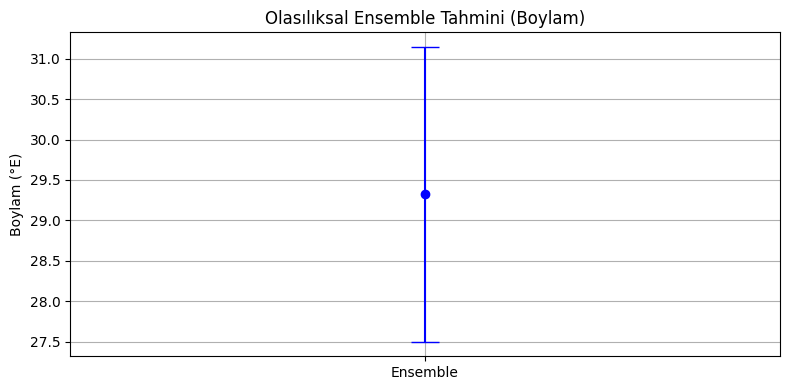

In [66]:
plt.figure(figsize=(8, 4))
plt.errorbar(["Ensemble"], [mean], yerr=[std], fmt='o', color='blue', capsize=10)
plt.title("Olasılıksal Ensemble Tahmini (Boylam)")
plt.ylabel("Boylam (°E)")
plt.grid(True)
plt.tight_layout()
plt.show()